# Numerically integrating functions of one variable

In this problem, you will learn how to approximately determine the integral of a functions of a single variable using the trapezoidal rule and Simpson's rule. You will compare your results to the simplest built-in integrator from the ``scipy.integrate`` library, ``quad``. In this notebook, we have started by walking through the results of a computing numerically the integral of a function with known anti-derivative, but have left developing the Simpson alogorithm to you.

## Import all the libraries

We will start by importing all the libarries and functions that we need. These can be called upon in any cell, but it's often useful to call them up in the first cell, so you know what's available. Also, to avoid conflicts in namespaces (i.e., functions and methods that appear in multiple libraries), we will use the ``as`` methods of importing libraries.

In [47]:
import sympy as sp                 ## Import symbolic python library
import numpy as np                 ## Import basic scientific computing library
import matplotlib.pyplot as plt    ## Import plotting library
from scipy.integrate import quad   ## Import a specific integrator from scipy.intergrate library

## Make sure our plots show up inline
%matplotlib inline

## Add some style to the printing of sympy functions and matplotlib plots
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
plt.style.use('ggplot')

## An example

We will work with a function with a known anti-derivative,

$$ g(x) = 10*e^{-x},$$

which are planning to integrate from 0 to 10,

$$I(0,10) = \int_0^{10} 10*e^{-x} dx.$$

If this all looks familar, please skip to the problem to solve below.

### Example: Plot this function

First, we will get a sense of what the function looks like over the domain we care about.

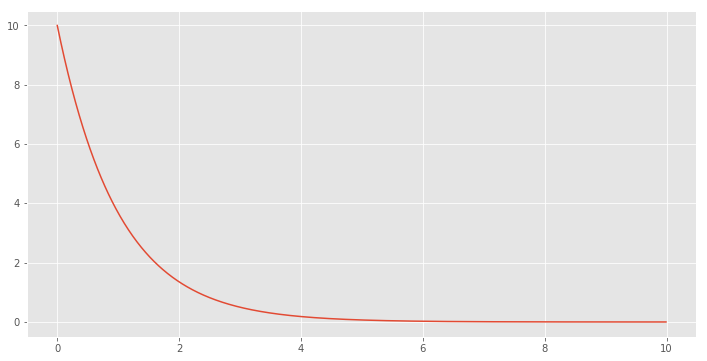

In [63]:
t = np.arange(0,10,0.01)
g = 10*np.exp(-t)

plt.figure(figsize=(12,6))
plt.plot(t,g)

### Example: Does it have a known anti-derivative?

Next, we can use the ``sympy`` library to check if this function has a known anti-derivative, that is, can it be integated analytically? 

In [49]:
x=sp.Symbol('x')
sp.integrate(10*sp.exp(-x),x)

In this case, the function has a known anti-derivative, so numerically finding the integral from 0 to 10 is not necessary. We can simply use the antiderivative to evaluate it at the end points and compute the integral,

$$I = -10*e^{-x}$$

So that,

$$I(0,10) = -10({e^{-10}-1}) \approx 9.9995460007$$

But let's see what happens when we numerically integrate it.

### Example: Define the function

First, we define the function, so we can call it as we use our trapezoidal method

In [65]:
def g(t):
    return 10*np.exp(-t)

### Example: Trapezoidal Approach
Now we apply the trapezodial algorithm to this integral to determine the approximate value. Here, we are using 10 equally sized steps.

In [51]:
N = 10
a = 0
b = 10
h = (b-a)/N
s = 0       # this just ensures we don't add more to it if we run it again!

s = 0.5*g(a) + 0.5*g(b)
for k in range(1,N):
    s += g(a+k*h)
    
I = s*h
print(I)

10.819275852028298


Our approximate answer isn't great. It's off by about 8%. We can increase the number of steps to get better.

In [52]:
N = 100
a = 0
b = 10
h = (b-a)/N
s = 0       # this just ensures we don't add more to it if we run it again!

s = 0.5*g(a) + 0.5*g(b)
for k in range(1,N):
    s += g(a+k*h)
    
I = s*h
print(I)

10.007877567207714


With 10 times more steps, we are now off by only about 0.08%! But we can do even better with more steps.

In [53]:
N = 1000
a = 0
b = 10
h = (b-a)/N
s = 0       # this just ensures we don't add more to it if we run it again!

s = 0.5*g(a) + 0.5*g(b)
for k in range(1,N):
    s += g(a+k*h)
    
I = s*h
print(I)

9.999629330113484


### Example: Can we do even better?

Now, we are only off by 0.0007%! We can keep doing this for a while, but at some point we are running too many iterations for the gain in precision. We will also run into the issue of machine precision, which is error inherent in the storing on numbers in a computer. 

There are better methods for numerical integration, which are inherently faster (fewer iterations for same or better precision) and/or adaptive to the problem (get you the best answer for your required precision). One of these is Gaussian quadrature, which the ``quad`` function performs. The first result is the integral result. What's the second one?

In [66]:
I = quad(g, 0, 10)
print(I)

(9.999546000702377, 2.83275284251709e-13)


## Problems to Solve

Up till now, most of your experience with integration has likely been integrating functions that have anti-derivatives. While this is kind of integration is problematic when you have data that must be integrated (e.g., using measures of position to determine potential energy), we will focus on functions for which there are no anti-derivatives.

Consider a line of charge that lives on the x-axis. It exists from $x=0$ to $x=3$, and distribution of that charge is given by,

$$\lambda(x) = 0.5e^{-x^2}.$$

In this problem, you will work through this Jupyter notebook to determine the total charge one this line by performing the integral,

$$Q = \int_0^3 0.5e^{-x^2} dx.$$

As you work through this problem, you will work through the following activities:

1. Plot the distribution of charge. Does it look familiar to you in some way? Maybe you've seen it in other classes?
2. Use ``sympy`` to compute the integral of the function (i.e., the total charge). What does it return? Discuss the function. Is it analytic?
3. Apply the trapezoidal rule to compute the integral of this function. Use 10 equal width steps. To receive full credit, you must write the code to do this and not use built-in integration functions of ``scipy``.
4. Apply Simpson's rule to compute the integral of this function. Again, use 10 equal with steps. Compare the result to part 3. To receive full credit, you must write the code to do this and not use built-in integration functions of ``scipy``.
5. Compute both integrals with increasingly more steps (i.e., from 10 to 100) and plot the results. That is compare the plots of what your integration schemes produce on a figure where the number of steps in on the horizontal axes and the value of the integral is on the vertical.
6. Look up ``scipy.integrate`` built-in quadrature function, ``quad.`` Use it to compute the same integral and compare its result to what your code produced. What are the two variables that ``quad`` gives you by default?
7. Explain how the trapezoidal rule and Simpson's rule are different. How do the compute the integrals? Explain how the [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature), which is what ``quad`` and its cousins in the ``scipy.integrate`` library do, is different from both of them.

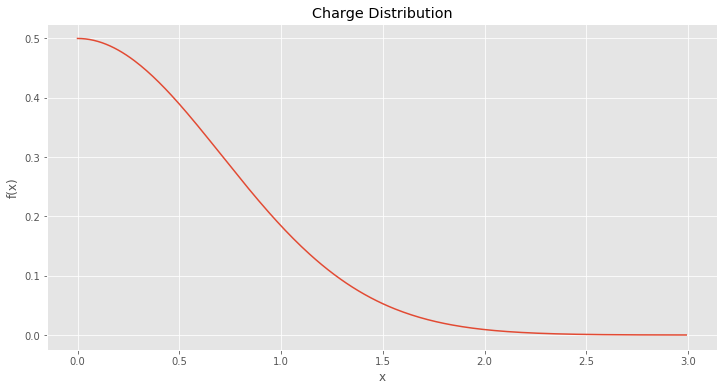

In [67]:
##Plotting charge 
t = np.arange(0,3,0.01)
f = 0.5*np.exp(-(t**2))

plt.figure(figsize=(12,6))
plt.title('Charge Distribution')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(t,f)

In [39]:
##Integrating with sympy. Non-analytically, only gives general solution.
##More work is required to find the numerial value of the integral from 0 to 3
x=sp.Symbol('x')
sp.integrate(0.5*sp.exp(-(x**2)),x)

In [68]:
##Integrating using the trapezial method 
def f(t):
    return 0.5*np.exp(-(t**2))

In [15]:
##Looping over 10 steps
N = 10
a = 0
b = 3
h = (b-a)/N
s = 0 

s = 0.5*f(a) + 0.5*f(b)
for k in range(1,N):
    s += f(a+k*h)
    
I = s*h
print(I)

0.4431010168186999


In [24]:
##Integrating with Simpson's Rule 
N = 10
a = 0 
b = 3
h = (b-a)/N
s = 0 

s = (h/3)*(f(a)+f(b))
##Collecting odd terms
s_o = 0 
for k in range(1,N-1,2): 
    s_o += f(a+k*h)
    
##Collecting even terms 
s_e = 0 
for k in range(2,N-2,2): 
    s_e +=f(a+k*h)
    
##Put it all together 
I = s + (h/3)*(4*s_o + 2*s_e)
print(I)

0.442651699352608


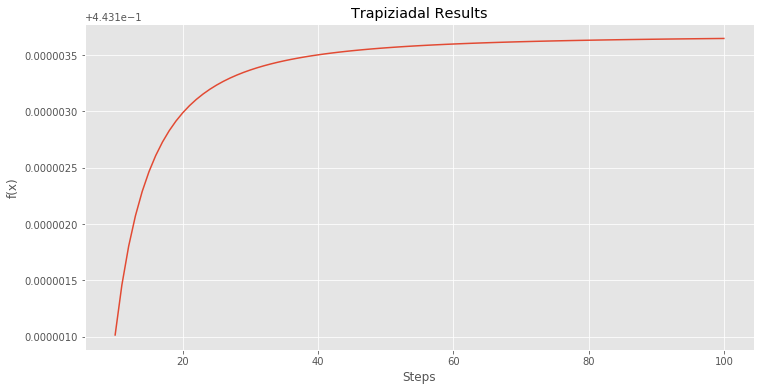

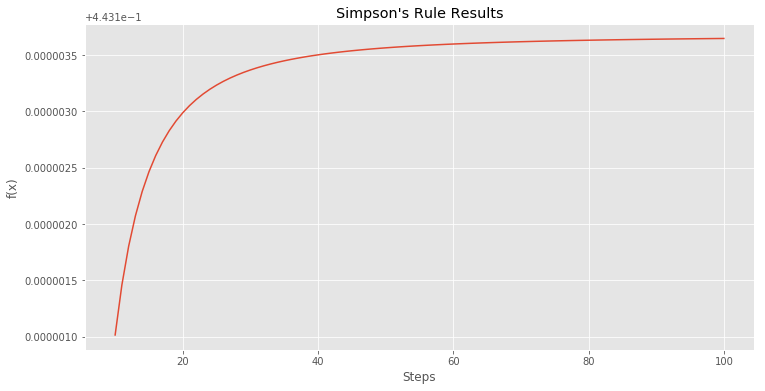

In [30]:
##Both with a lot of steps 
a = 0 
b = 3

##Trapizial (one day I will spell this right. Today is not that day.)
s=0
t_lst = []
n_lst = []
for N in range(10,101):
    h=(b-a)/N
    s=0
    s = 0.5*f(a) + 0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    
    t_lst.append(s*h)
    n_lst.append(N)
    
plt.figure(figsize=(12,6))
plt.title('Trapiziadal Results')
plt.xlabel('Steps')
plt.ylabel('f(x)')

plt.plot(n_lst,t_lst)

##Simpson's Rule
s=0
s_lst = []
for N in range(10,101):
    h = (b-a)/N
    s = 0 

    s = (h/3)*(f(a)+f(b))
    ##Collecting odd terms
    s_o = 0 
    for k in range(1,N-1,2): 
        s_o += f(a+k*h)
    
    ##Collecting even terms 
    s_e = 0 
    for k in range(2,N-2,2): 
        s_e +=f(a+k*h)
        
    s_lst.append(s + (h/3)*(4*s_o + 2*s_e))
    
plt.figure(figsize=(12,6))
plt.title('Simpson\'s Rule Results')
plt.xlabel('Steps')
plt.ylabel('f(x)')

plt.plot(n_lst,t_lst)  

In [69]:
I = quad(f, 0, 3)
print(I)
##Returns the value of the integral, and the error estimate

(0.4431036741297607, 1.5884111866340027e-11)


The trapizoial method and Simpson's rule run on like principals. They both use summation of small areas under the curve to give results. The main difference is that the trapizoial method uses a straight line to approximate the curve, while Simpson's rule uses a quadratic functions to approximate the curvature of the function to be integrated. Gaussian quadrature, on the other hand, approximates the function by rewritting it to be $f(x)=(1-x)^{\alpha}(1+x)^{\beta}g(x)$, and using a wieghting function and this low degree polynomail to write the integral as $\Sigma^{n}_{i=1}w_ig(x_i)$